In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")
df['healthy'] = (df['calories'] < 120).astype(int)

Gaussian

In [8]:
X_gnb = df[['calories', 'protein', 'fat']]
y = df['healthy']

X_train_gnb, X_test_gnb, y_train, y_test = train_test_split(X_gnb, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train)
gnb_preds = gnb.predict(X_test_gnb)

gnb_acc = accuracy_score(y_test, gnb_preds)
gnb_cm = confusion_matrix(y_test, gnb_preds)


BernoulliNB

In [9]:
binarizer = Binarizer()
X_bin = binarizer.fit_transform(X_gnb)

X_train_bin, X_test_bin, _, _ = train_test_split(X_bin, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)
bnb_preds = bnb.predict(X_test_bin)

bnb_acc = accuracy_score(y_test, bnb_preds)
bnb_cm = confusion_matrix(y_test, bnb_preds)

Categorical

In [10]:
def categorize(series, bins):
    return pd.cut(series, bins=bins, labels=False, include_lowest=True)

df_cat = df.copy()
df_cat['calories_cat'] = categorize(df_cat['calories'], [0, 100, 200, np.inf])
df_cat['protein_cat'] = categorize(df_cat['protein'], [0, 4, 8, np.inf])
df_cat['fat_cat'] = categorize(df_cat['fat'], [0, 2, 4, np.inf])

X_cat = df_cat[['calories_cat', 'protein_cat', 'fat_cat']]

X_train_cat, X_test_cat, _, _ = train_test_split(X_cat, y, test_size=0.3, random_state=42)

cnb = CategoricalNB()
cnb.fit(X_train_cat, y_train)
cnb_preds = cnb.predict(X_test_cat)

cnb_acc = accuracy_score(y_test, cnb_preds)
cnb_cm = confusion_matrix(y_test, cnb_preds)

GaussianNB Accuracy: 0.97
BernoulliNB Accuracy: 0.75
CategoricalNB Accuracy: 0.92


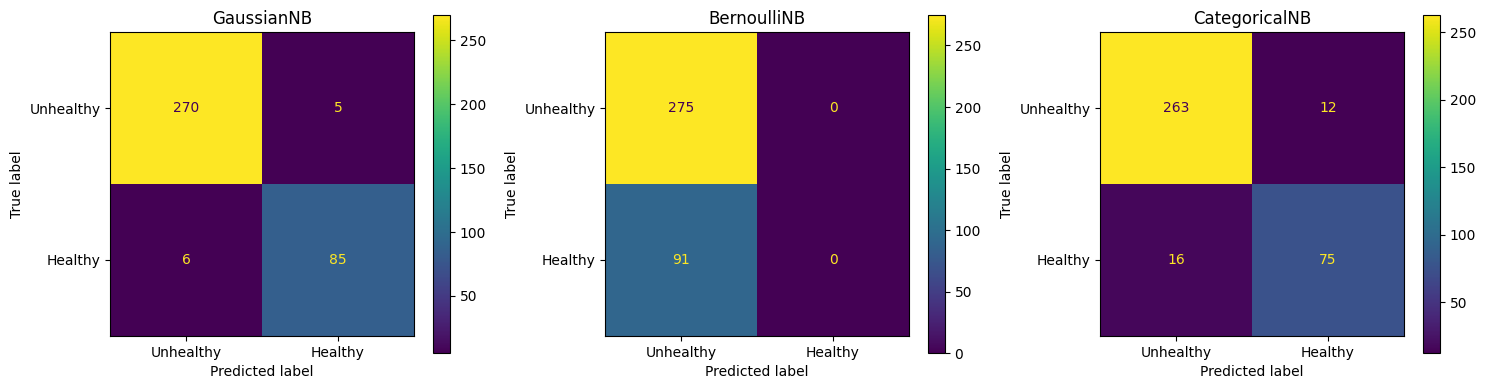

In [11]:
print("GaussianNB Accuracy:", round(gnb_acc, 2))
print("BernoulliNB Accuracy:", round(bnb_acc, 2))
print("CategoricalNB Accuracy:", round(cnb_acc, 2))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
titles = ['GaussianNB', 'BernoulliNB', 'CategoricalNB']
cms = [gnb_cm, bnb_cm, cnb_cm]

for i, cm in enumerate(cms):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Unhealthy', 'Healthy'])
    disp.plot(ax=axs[i], values_format='d')
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()
